## Scipy

* Library for scientific computing

In [1]:
import scipy

In [2]:
# !pip install --user scipy

## Introduction


The SciPy framework builds on top of the low-level NumPy framework for multidimensional arrays, and provides a large number of higher-level scientific algorithms. Some of the topics that SciPy covers are:

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

Each of these submodules provides a number of functions and classes that can be used to solve problems in their respective topics.

In this lecture we will look at how to use some of these subpackages.

To access the SciPy package in a Python program, we start by importing everything from the `scipy` module.

In [3]:
from scipy import *

If we only need to use part of the SciPy framework we can selectively include only those modules we are interested in. For example, to include the linear algebra package under the name la, we can do:

In [4]:
import scipy.linalg as la

## Ordinary differential equations (ODEs)

SciPy provides two different ways to solve ODEs: An API based on the function `odeint`, and object-oriented API based on the class `ode`. Usually `odeint` is easier to get started with, but the `ode` class offers some finer level of control.

Here we will use the `odeint` functions. For more information about the class `ode`, try `help(ode)`. It does pretty much the same thing as `odeint`, but in an object-oriented fashion.

To use `odeint`, first import it from the `scipy.integrate` module

In [5]:
from scipy.integrate import odeint, ode

A system of ODEs are usually formulated on standard form before it is attacked numerically. The standard form is:

$y' = f(y, t)$

where 

$y = [y_1(t), y_2(t), ..., y_n(t)]$ 

and $f$ is some function that gives the derivatives of the function $y_i(t)$. To solve an ODE we need to know the function $f$ and an initial condition, $y(0)$.

Note that higher-order ODEs can always be written in this form by introducing new variables for the intermediate derivatives.

Once we have defined the Python function `f` and array `y_0` (that is $f$ and $y(0)$ in the mathematical formulation), we can use the `odeint` function as:

    y_t = odeint(f, y_0, t)

where `t` is and array with time-coordinates for which to solve the ODE problem. `y_t` is an array with one row for each point in time in `t`, where each column corresponds to a solution `y_i(t)` at that point in time. 

We will see how we can implement `f` and `y_0` in Python code in the examples below.

#### Example: 

$dy(t)/dt = -ky(t)$

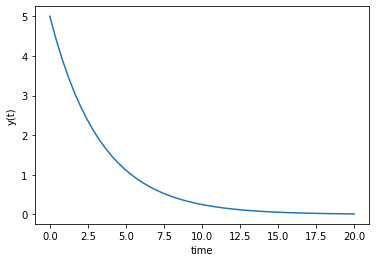

In [6]:
# function that returns dy/dt
import matplotlib.pyplot as plt
import numpy as np

def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20) # evenly spaced number


# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

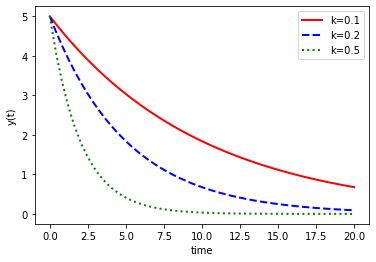

In [7]:
def model(y,t,k):
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODEs
k = 0.1
y1 = odeint(model,y0,t,args=(k,))
k = 0.2
y2 = odeint(model,y0,t,args=(k,))
k = 0.5
y3 = odeint(model,y0,t,args=(k,))

# plot results
plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'b--',linewidth=2,label='k=0.2')
plt.plot(t,y3,'g:',linewidth=2,label='k=0.5')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()


In [8]:
help(odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
    Integrate a system of ordinary differential equations.
    
    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t, ...)  [or func(t, y, ...)]
    
    where y can be a vector.
    
    .. note:: By default, the required order of the first two arguments of
              `func` are in the opposite order of the arguments in the system
              definition function used by the `scipy.integrate.ode` class and
     

#### Exercise 01 : Damped harmonic oscillator

ODE problems are important in computational physics, so we will look at one more example: the damped harmonic oscillation. This problem is well described on the wiki page: http://en.wikipedia.org/wiki/Damping

The equation of motion for the damped oscillator is:

$\displaystyle \frac{\mathrm{d}^2x}{\mathrm{d}t^2} + 2\zeta\omega_0\frac{\mathrm{d}x}{\mathrm{d}t} + \omega^2_0 x = 0$

where $x$ is the position of the oscillator, $\omega_0$ is the frequency, and $\zeta$ is the damping ratio. To write this second-order ODE on standard form we introduce $p = \frac{\mathrm{d}x}{\mathrm{d}t}$:

$\displaystyle \frac{\mathrm{d}p}{\mathrm{d}t} = - 2\zeta\omega_0 p - \omega^2_0 x$

$\displaystyle \frac{\mathrm{d}x}{\mathrm{d}t} = p$

In the implementation of this example we will add extra arguments to the RHS function for the ODE so that we can pass in the damping parameters, rather than using global variables as we did in the previous example. As a consequence of the extra arguments to the RHS, we need to pass an keyword argument `args` to the `odeint` function. Please solve above problem for undamped $\omega_0$=0.0 , under-damped $\omega_0$ < 1.0, critically damped $\omega_0$ =1.0, and over damped $\omega_0$ > 1.0 situations   using python.

## Fourier Transform

Fourier transforms are one of the universal tools in computational physics, which appear over and over again in different contexts. SciPy provides functions for accessing the classic [FFTPACK](http://www.netlib.org/fftpack/) library from NetLib, which is an efficient and well tested FFT library written in FORTRAN. The SciPy API has a few additional convenience functions, but overall the API is closely related to the original FORTRAN library.

To use the `fftpack` module in a python program, include it using:

To demonstrate how to do a fast Fourier transform with SciPy, let's look at the FFT of the solution to the damped oscillator from the previous exercise:

In [9]:
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import numpy as np
from scipy.integrate import odeint, ode

def dy(y, t, zeta, w0):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]
y0 = [1.0, 0.0]
t = np.linspace(0, 10, 1000)
w0 = 2*pi*1.0
y1 = odeint(dy, y0, t, args=(0.0, w0)) 
y2 = odeint(dy, y0, t, args=(0.2, w0))
y3 = odeint(dy, y0, t, args=(1.0, w0)) 
y4 = odeint(dy, y0, t, args=(5.0, w0))

In [10]:
# Let's calculate the fourier transfrom
N = len(t)
dt = t[1]-t[0]

# calculate the fast fourier transform
# y2 is the solution to the under-damped oscillator from the previous section
F = fft(y2[:,0]) 

# calculate the frequencies for the components in F
w = fftfreq(N, dt)

Text(0.5, 0, 'Frequency')

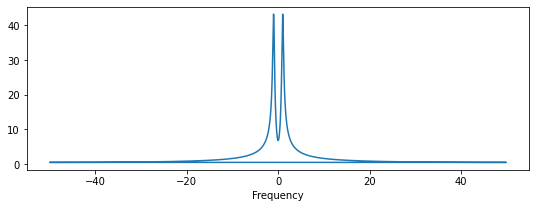

In [11]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w, abs(F));
ax.set_xlabel('Frequency')

Since the signal is real, the spectrum is symmetric. We therefore only need to plot the part that corresponds to the postive frequencies. To extract that part of the `w` and `F` we can use some of the indexing tricks for NumPy arrays that we saw in Lecture 2

In [12]:
indices = np.where(w > 0) # select only indices for elements that corresponds to positive frequencies
w_pos = w[indices]
F_pos = F[indices]

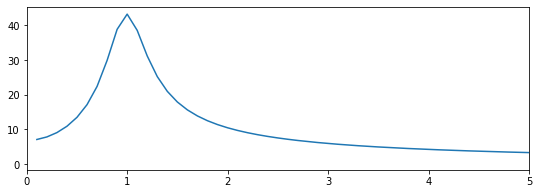

In [13]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w_pos, abs(F_pos))
ax.set_xlim(0, 5);

As expected, we now see a peak in the spectrum that is centered around 1, which is the frequency we used in the damped oscillator example.

## Special functions

A large number of mathematical special functions are important for many computional physics problems. SciPy provides implementations of a very extensive set of special functions. For details, see the list of functions in the reference documention at http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special. 

To demonstrate the typical usage of special functions we will look in more detail at the Bessel functions:

The Bessel functions of the first kind `J_n(x)` are defined as the solutions to the Bessel differential equation

 $x^2(d^2y)/(dx^2)+x(dy)/(dx)+(x^2-n^2)y=0$

In [14]:
#
# The scipy.special module includes a large number of Bessel-functions
# Here we will use the functions jn and yn, which are the Bessel functions 
# of the first and second kind and real-valued order. We also include the 
# function jn_zeros and yn_zeros that gives the zeroes of the functions jn
# and yn.
#
from scipy.special import jn, yn, jn_zeros, yn_zeros

In [15]:
n = 0    
x = 0.0 # order

# Bessel function of first kind
print ("J_%d(%f) = %f" % (n, x, jn(n, x)))

x = 1.0
# Bessel function of second kind
print ("Y_%d(%f) = %f" % (n, x, yn(n, x)))

J_0(0.000000) = 1.000000
Y_0(1.000000) = 0.088257


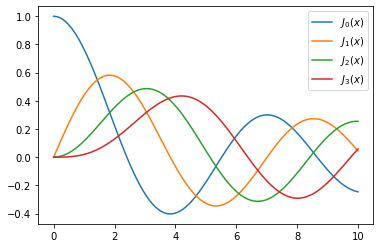

In [16]:
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
ax.legend();

In [17]:
# zeros of Bessel functions
n = 0 # order
m = 4 # number of roots to compute
jn_zeros(n, m)

array([ 2.40482556,  5.52007811,  8.65372791, 11.79153444])

## Interpolation


Interpolation is simple and convenient in scipy: The `interp1d` function, when given arrays describing X and Y data, returns and object that behaves like a function that can be called for an arbitrary value of x (in the range covered by X), and it returns the corresponding interpolated y value:

In [18]:
from scipy.interpolate import interp1d
import numpy as np



In [19]:
x = np.arange(10)
y = 2*x + 1

print(x)
print(y)

interp_func = interp1d(x, y)

new_x = np.arange(2.1, 3, 0.1)
print(new_x)
newarr = interp_func(new_x)

print(newarr)

[0 1 2 3 4 5 6 7 8 9]
[ 1  3  5  7  9 11 13 15 17 19]
[2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9]
[5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8]


In [20]:
def f(x):
    return np.sin(x)

n = np.arange(0, 10)  
x = np.linspace(0, 9, 100)

y_meas = f(n) + 0.1 * np.random.randn(len(n)) # simulate measurement with noise
y_real = f(x)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)


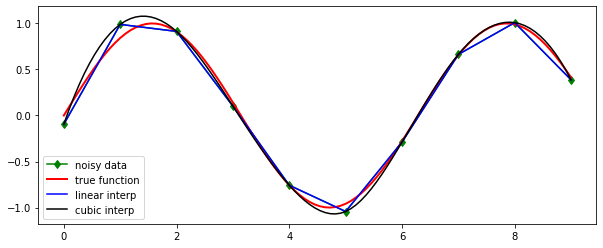

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'g', label='noisy data',marker='d')
ax.plot(x, y_real, 'red', lw=2, label='true function')
ax.plot(x, y_interp1, 'blue', label='linear interp')
ax.plot(x, y_interp2, 'black', label='cubic interp')
ax.legend();

## Integration

### Numerical integration: quadrature

Numerical evaluation of a function of the type

$\displaystyle \int_a^b f(x) dx$

is called *numerical quadrature*, or simply *quadature*. SciPy provides a series of functions for different kind of quadrature, for example the `quad`, `dblquad` and `tplquad` for single, double and triple integrals, respectively.



In [22]:
from scipy.integrate import quad, dblquad, tplquad

The `quad` function takes a large number of optional arguments, which can be used to fine-tune the behaviour of the function (try `help(quad)` for details).

The basic usage is as follows:

In [23]:
# define a simple function for the integrand
def f(x):
    return x

In [24]:
x_lower = 0 # the lower limit of x
x_upper = 1 # the upper limit of x

val, abserr = quad(f, x_lower, x_upper)

print ("integral value =", val, ", absolute error =", abserr )

integral value = 0.5 , absolute error = 5.551115123125783e-15


If we need to pass extra arguments to integrand function we can use the `args` keyword argument:

In [25]:
def integrand(x, n):
    """
    Bessel function of first kind and order n. 
    """
    return jn(n, x)


x_lower = 0  # the lower limit of x
x_upper = 10 # the upper limit of x

val, abserr = quad(integrand, x_lower, x_upper, args=(3,))

print (val, abserr )

0.7366751370811073 9.389126882496403e-13


For simple functions we can use a lambda function (name-less function) instead of explicitly defining a function for the integrand:

In [26]:
val, abserr = quad(lambda x: np.exp(-x ** 2), -Inf, Inf)

print ("numerical  =", val, abserr)

analytical = np.sqrt(pi)
print ("analytical =", analytical)

numerical  = 1.7724538509055159 1.4202636780944923e-08
analytical = 1.7724538509055159


As show in the example above, we can also use 'Inf' or '-Inf' as integral limits.

Higher-dimensional integration works in the same way:

In [27]:
def integrand(x, y):
    return np.exp(-x**2-y**2)

x_lower = 0  
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = dblquad(integrand, x_lower, x_upper, lambda x : y_lower, lambda x: y_upper)

print (val, abserr) 

0.7853981633974476 1.3753098510218528e-08


Note how we had to pass lambda functions for the limits for the y integration, since these in general can be functions of x.

## Linear Algebra

The linear algebra module contains a lot of matrix related functions, including linear equation solving, eigenvalue solvers, matrix functions (for example matrix-exponentiation), a number of different decompositions (SVD, LU, cholesky), etc. 

Detailed documetation is available at: http://docs.scipy.org/doc/scipy/reference/linalg.html

Here we will look at how to use some of these functions:


### Linear equation systems

Linear equation systems on the matrix form

$A x = b$

where $A$ is a matrix and $x,b$ are vectors can be solved like:

In [28]:
from scipy.linalg import *

In [29]:
A = np.array([[1,2,3], [4,2,6], [7,5,9]])
b = np.array([1,2,3])

In [30]:
x = solve(A, b)

x

array([1.26882631e-16, 0.00000000e+00, 3.33333333e-01])

In [31]:
# check
np.dot(A, x) - b

array([-1.11022302e-16,  0.00000000e+00,  0.00000000e+00])

We can also do the same with

$A X = B$

where $A, B, X$ are matrices:

In [32]:
A = np.random.rand(3,3)
B = np.random.rand(3,3)

In [33]:
X = solve(A, B)

In [34]:
X

array([[-1.97335851, -1.8839652 , -0.05458706],
       [-3.04789914, -2.71230645, -1.41807958],
       [ 2.55985864,  2.09652927,  0.80181402]])

In [35]:
# check
norm(np.dot(A, X) - B)

5.640599496620651e-16

### Eigenvalues and eigenvectors

The eigenvalue problem for a matrix $A$:

$\displaystyle A v_n = \lambda_n v_n$

where $v_n$ is the $n$th eigenvector and $\lambda_n$ is the $n$th eigenvalue.

To calculate eigenvalues of a matrix, use the `eigvals` and for calculating both eigenvalues and eigenvectors, use the function `eig`:

In [36]:
evals = eigvals(A)

In [37]:
evals

array([ 1.77476871+0.j, -0.49498877+0.j, -0.07359978+0.j])

In [38]:
evals, evecs = eig(A)

In [39]:
evals

array([ 1.77476871+0.j, -0.49498877+0.j, -0.07359978+0.j])

In [40]:
evecs

array([[-0.54867375, -0.52917693, -0.47119564],
       [-0.59613273,  0.84836039, -0.73855058],
       [-0.58615944,  0.01601347,  0.48220091]])

The eigenvectors corresponding to the $n$th eigenvalue (stored in `evals[n]`) is the $n$th *column* in `evecs`, i.e., `evecs[:,n]`. To verify this, let's try mutiplying eigenvectors with the matrix and compare to the product of the eigenvector and the eigenvalue:

In [41]:
n = 1

norm(np.dot(A, evecs[:,n]) - evals[n] * evecs[:,n])

2.0026854743534788e-16

There are also more specialized eigensolvers, like the `eigh` for Hermitian matrices. 

### Matrix operations

In [42]:
# the matrix inverse
inv(A)

array([[-4.46875568, -1.64783761,  6.38626765],
       [-4.17858957, -4.80356326,  9.36969777],
       [ 3.98803476,  2.55840105, -5.77147205]])

In [43]:
# determinant
det(A)

0.06465671533888073

In [44]:
# norms of various orders
norm(A, ord=2), norm(A, ord=Inf)

(1.986960007649263, 1.859398297008314)

### Sparse matrices

Sparse matrices are often useful in numerical simulations dealing with large systems, if the problem can be described in matrix form where the matrices or vectors mostly contains zeros. Scipy has a good support for sparse matrices, with basic linear algebra operations (such as equation solving, eigenvalue calculations, etc).

There are many possible strategies for storing sparse matrices in an efficient way. Some of the most common are the so-called coordinate form (COO), list of list (LIL) form,  and compressed-sparse column CSC (and row, CSR). Each format has some advantanges and disadvantages. Most computational algorithms (equation solving, matrix-matrix multiplication, etc) can be efficiently implemented using CSR or CSC formats, but they are not so intuitive and not so easy to initialize. So often a sparse matrix is initially created in COO or LIL format (where we can efficiently add elements to the sparse matrix data), and then converted to CSC or CSR before used in real calcalations.

For more information about these sparse formats, see e.g. http://en.wikipedia.org/wiki/Sparse_matrix

When we create a sparse matrix we have to choose which format it should be stored in. For example, 

In [45]:
from scipy.sparse import *

In [46]:
# dense matrix
import numpy as np
M = np.array([[1,0,0,0], [0,3,0,0], [0,1,1,0], [1,0,0,1]])

In [47]:
M

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]])

In [48]:
# convert from dense to sparse
A = csr_matrix(M)

In [49]:
print(A)

  (0, 0)	1
  (1, 1)	3
  (2, 1)	1
  (2, 2)	1
  (3, 0)	1
  (3, 3)	1


In [50]:
# convert from sparse to dense
A.todense()

matrix([[1, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]])

More efficient way to create sparse matrices: create an empty matrix and populate with using matrix indexing (avoids creating a potentially large dense matrix)

In [51]:
A = lil_matrix((4,4)) # empty 4x4 sparse matrix
print(A)
A[0,0] = 1
A[1,1] = 3
A[2,2] = A[2,1] = 1
A[3,3] = A[3,0] = 1
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in List of Lists format>

In [52]:
A.todense()

matrix([[1., 0., 0., 0.],
        [0., 3., 0., 0.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.]])

Converting between different sparse matrix formats:

In [53]:
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in List of Lists format>

In [54]:
A = csr_matrix(A)

In [55]:
A = csc_matrix(A)

We can compute with sparse matrices like with dense matrices:

In [56]:
A.todense()

matrix([[1., 0., 0., 0.],
        [0., 3., 0., 0.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.]])

In [57]:
(A * A).todense()

matrix([[1., 0., 0., 0.],
        [0., 9., 0., 0.],
        [0., 4., 1., 0.],
        [2., 0., 0., 1.]])

In [58]:
A.todense()

matrix([[1., 0., 0., 0.],
        [0., 3., 0., 0.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.]])

In [59]:
A.dot(A).todense()

matrix([[1., 0., 0., 0.],
        [0., 9., 0., 0.],
        [0., 4., 1., 0.],
        [2., 0., 0., 1.]])

In [60]:
v = np.array([1,2,3,4])[:,newaxis]; v

array([[1],
       [2],
       [3],
       [4]])

In [61]:
# sparse matrix - dense vector multiplication
A * v

array([[1.],
       [6.],
       [5.],
       [5.]])

In [62]:
# same result with dense matrix - dense vector multiplcation
A.todense() * v

matrix([[1.],
        [6.],
        [5.],
        [5.]])

### Singular value decompositionm

Singular value decomposition is essentially trying to reduce a rank R  matrix to a rank K matrix. It means that we can take a list of R  unique vectors, and approximate them as a linear combination of K  unique vectors.

For more information about these svd , see e.g. https://en.wikipedia.org/wiki/Singular_value_decomposition


Factorizes the matrix `a` into two unitary matrices ``U`` and ``Vh``, and
    a 1-D array ``s`` of singular values (real, non-negative) such that
    ``a == U @ S @ Vh``, where ``S`` is a suitably shaped matrix of zeros with
    main diagonal ``s``.

In [63]:
from scipy.linalg import svd
help(svd) 

Help on function svd in module scipy.linalg.decomp_svd:

svd(a, full_matrices=True, compute_uv=True, overwrite_a=False, check_finite=True, lapack_driver='gesdd')
    Singular Value Decomposition.
    
    Factorizes the matrix `a` into two unitary matrices ``U`` and ``Vh``, and
    a 1-D array ``s`` of singular values (real, non-negative) such that
    ``a == U @ S @ Vh``, where ``S`` is a suitably shaped matrix of zeros with
    main diagonal ``s``.
    
    Parameters
    ----------
    a : (M, N) array_like
        Matrix to decompose.
    full_matrices : bool, optional
        If True (default), `U` and `Vh` are of shape ``(M, M)``, ``(N, N)``.
        If False, the shapes are ``(M, K)`` and ``(K, N)``, where
        ``K = min(M, N)``.
    compute_uv : bool, optional
        Whether to compute also ``U`` and ``Vh`` in addition to ``s``.
        Default is True.
    overwrite_a : bool, optional
        Whether to overwrite `a`; may improve performance.
        Default is False.
    

In [64]:
from scipy import linalg
m, n = 9, 6
a = np.random.randn(m, n) + 1.j*np.random.randn(m, n)
U, s, Vh = linalg.svd(a)
U.shape,  s.shape, Vh.shape

((9, 9), (6,), (6, 6))

In [65]:
# Reconstruct the original matrix from the decomposition:
sigma = np.zeros((m, n))
for i in range(min(m, n)):
    sigma[i, i] = s[i]
a1 = np.dot(U, np.dot(sigma, Vh))
np.allclose(a, a1)

True

## Optimization 

Optimization (finding minima or maxima of a function) is a large field in mathematics, and optimization of complicated functions or in many variables can be rather involved. Here we will only look at a few very simple cases. For a more detailed introduction to optimization with SciPy see: http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

To use the optimization module in scipy first include the `optimize` module:

In [66]:
from scipy import optimize

### Finding a minima

Let's first look at how to find the minima of a simple function of a single variable:

In [67]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

Text(0, 0.5, 'y')

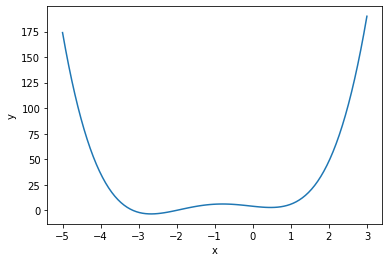

In [68]:
import matplotlib.pyplot as plt
fig, ax  = plt.subplots()
x = np.linspace(-5, 3, 100) # 100 numbers from -5 to 3 with equal spacing 
ax.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('y')

In [69]:
help(optimize.fmin_bfgs)

Help on function fmin_bfgs in module scipy.optimize.optimize:

fmin_bfgs(f, x0, fprime=None, args=(), gtol=1e-05, norm=inf, epsilon=1.4901161193847656e-08, maxiter=None, full_output=0, disp=1, retall=0, callback=None)
    Minimize a function using the BFGS algorithm.
    
    Parameters
    ----------
    f : callable f(x,*args)
        Objective function to be minimized.
    x0 : ndarray
        Initial guess.
    fprime : callable f'(x,*args), optional
        Gradient of f.
    args : tuple, optional
        Extra arguments passed to f and fprime.
    gtol : float, optional
        Gradient norm must be less than gtol before successful termination.
    norm : float, optional
        Order of norm (Inf is max, -Inf is min)
    epsilon : int or ndarray, optional
        If fprime is approximated, use this value for the step size.
    callback : callable, optional
        An optional user-supplied function to call after each
        iteration. Called as callback(xk), where xk is the
  

We can use the `fmin_bfgs` function to find the minima of a function:

In [70]:
x_min = optimize.fmin_bfgs(f, -2)
x_min 

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 16
         Gradient evaluations: 8


array([-2.67298151])

In [71]:
optimize.fmin_bfgs(f, -0.79) 

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 18
         Gradient evaluations: 9


array([0.46961743])

We can also use the `brent` or `fminbound` functions. They have a bit different syntax and use different algorithms. 

In [72]:
optimize.brent(f)

0.46961743402759754

In [73]:
optimize.fminbound(f, -4, 2)

-2.6729822917513886

### Finding a solution to a function

To find the root for a function of the form $f(x) = 0$ we can use the `fsolve` function. It requires an initial guess: 

In [74]:
help(optimize.fsolve)

Help on function fsolve in module scipy.optimize.minpack:

fsolve(func, x0, args=(), fprime=None, full_output=0, col_deriv=0, xtol=1.49012e-08, maxfev=0, band=None, epsfcn=None, factor=100, diag=None)
    Find the roots of a function.
    
    Return the roots of the (non-linear) equations defined by
    ``func(x) = 0`` given a starting estimate.
    
    Parameters
    ----------
    func : callable ``f(x, *args)``
        A function that takes at least one (possibly vector) argument,
        and returns a value of the same length.
    x0 : ndarray
        The starting estimate for the roots of ``func(x) = 0``.
    args : tuple, optional
        Any extra arguments to `func`.
    fprime : callable ``f(x, *args)``, optional
        A function to compute the Jacobian of `func` with derivatives
        across the rows. By default, the Jacobian will be estimated.
    full_output : bool, optional
        If True, return optional outputs.
    col_deriv : bool, optional
        Specify wheth

In [75]:
def eqn(x):
  return x**2 + 2*x + 1



In [76]:
root = optimize.fsolve(eqn,1)

In [77]:
root

array([-1.])

In [78]:
np.isclose(eqn(root), 0)

array([ True])

## Example 2

Find the solution to the function: x[0] * np.cos(x[1]) - 4 and x[1] * x[0] - x[1] - 5

## Statistics

The `scipy.stats` module contains a large number of statistical distributions, statistical functions and tests. For a complete documentation of its features, see http://docs.scipy.org/doc/scipy/reference/stats.html.

There is also a very powerful python package for statistical modelling called statsmodels. See http://statsmodels.sourceforge.net for more details.

In [79]:
from scipy import stats

In [80]:
# create a (discreet) random variable with poisson distribution

X = stats.poisson(3.5) 

In [81]:
X

* Probability mass function of a variable X assign probabilities to the possible values of the random variable


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


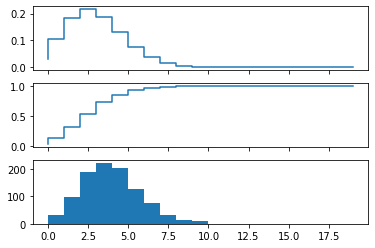

In [82]:
n = np.arange(0,20)
print(n)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability mass function (PMF) for the given random value at different value of n
axes[0].step(n, X.pmf(n))

# plot the cummulative distribution function (CDF)
axes[1].step(n, X.cdf(n))

# plot histogram of 1000 random variates of the stochastic variable X
axes[2].hist(X.rvs(size=1000));

In [83]:
# create a (continous) random variable with normal distribution
Y = stats.norm()

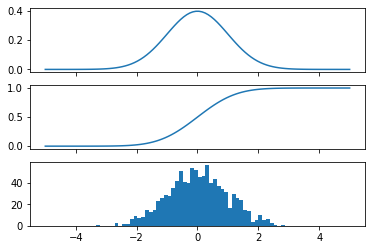

In [84]:
x = np.linspace(-5,5,100)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability distribution function (PDF)
axes[0].plot(x, Y.pdf(x))

# plot the commulative distributin function (CDF)
axes[1].plot(x, Y.cdf(x));

# plot histogram of 1000 random variates of the stochastic variable Y
axes[2].hist(Y.rvs(size=1000), bins=50);

In [85]:
X.mean(), X.std(), X.var() # poission distribution

(3.5, 1.8708286933869707, 3.5)

In [86]:
Y.mean(), Y.std(), Y.var() # normal distribution

(0.0, 1.0, 1.0)

### Statistical tests

Test if two sets of (independent) random data comes from the same distribution:

In [87]:
t_statistic, p_value = stats.ttest_ind(X.rvs(size=1000), X.rvs(size=1000))

print ("t-statistic =", t_statistic)
print ("p-value =", p_value)

t-statistic = 0.3965784976173961
p-value = 0.691720662830752


In [88]:
help(stats.ttest_ind)

Help on function ttest_ind in module scipy.stats.stats:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which does not assume equal
        populatio

Since the p value is very large we cannot reject the hypothesis that the two sets of random data have *different* means.

To test if the mean of a single sample of data has mean 0.1 (the true mean is 0.0):

In [89]:
stats.ttest_1samp(Y.rvs(size=1000), 0.1)

Ttest_1sampResult(statistic=-5.451955208466944, pvalue=6.278190830438168e-08)

In [90]:
help(stats.ttest_1samp)

Help on function ttest_1samp in module scipy.stats.stats:

ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative='two-sided')
    Calculate the T-test for the mean of ONE group of scores.
    
    This is a two-sided test for the null hypothesis that the expected value
    (mean) of a sample of independent observations `a` is equal to the given
    population mean, `popmean`.
    
    Parameters
    ----------
    a : array_like
        Sample observation.
    popmean : float or array_like
        Expected value in null hypothesis. If array_like, then it must have the
        same shape as `a` excluding the axis dimension.
    axis : int or None, optional
        Axis along which to compute test; default is 0. If None, compute over
        the whole array `a`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan.
        The following options are available (default is 'propagate'):
    
          * 'propagate': re

Low p-value means that we can reject the hypothesis that the mean of Y is 0.1.

In [91]:
Y.mean()

0.0

In [92]:
stats.ttest_1samp(Y.rvs(size=1000), Y.mean())

Ttest_1sampResult(statistic=0.04888554798299603, pvalue=0.9610202775640091)

## Further reading

* http://www.scipy.org - The official web page for the SciPy project.
* http://docs.scipy.org/doc/scipy/reference/tutorial/index.html - A tutorial on how to get started using SciPy. 
* https://github.com/scipy/scipy/ - The SciPy source code. 

## Credit

Based on J.R. Johansson (jrjohansson at gmail.com) online training materials The latest version of this IPython notebook lecture is available at http://github.com/jrjohansson/scientific-python-lectures. The other notebooks in this lecture series are indexed at http://jrjohansson.github.io.m